In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv('train.csv')
x = data.drop('label',axis=1)
y = data['label']

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
x_train,x_test = x_train/255.0,x_test/255.0
x_train,x_test = np.c_[x_train],np.c_[x_test]
X_train = x_train.reshape(x_train.shape[0], 28, 28)
X_test = x_test.reshape(x_test.shape[0],28,28)

In [6]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(125,activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10)
model.evaluate(X_test,y_test)

Epoch 1/10
33600/33600 [==============================] - 3s 99us/step - loss: 0.3697 - acc: 0.8921
Epoch 2/10
33600/33600 [==============================] - 2s 53us/step - loss: 0.1793 - acc: 0.9468
Epoch 3/10
33600/33600 [==============================] - 2s 51us/step - loss: 0.1322 - acc: 0.9608
Epoch 4/10
33600/33600 [==============================] - 2s 57us/step - loss: 0.1030 - acc: 0.9686
Epoch 5/10
33600/33600 [==============================] - 2s 54us/step - loss: 0.0858 - acc: 0.9742
Epoch 6/10
33600/33600 [==============================] - 2s 55us/step - loss: 0.0748 - acc: 0.9765
Epoch 7/10
33600/33600 [==============================] - 2s 53us/step - loss: 0.0653 - acc: 0.9799
Epoch 8/10
33600/33600 [==============================] - 2s 56us/step - loss: 0.0559 - acc: 0.9825
Epoch 9/10
33600/33600 [==============================] - 2s 53us/step - loss: 0.0501 - acc: 0.9836
Epoch 10/10
8400/8400 [==============================] - 0s 23us/step


[0.0903305134631782, 0.9732142857142857]

In [7]:
pre = model.predict(X_test)

In [9]:
pre[0]

array([9.8832356e-09, 2.5564544e-09, 3.4544826e-02, 5.5085499e-11,
       9.5554769e-01, 1.3068298e-10, 9.9074244e-03, 7.5979576e-13,
       1.3284394e-11, 2.2679677e-12], dtype=float32)

In [17]:
np.argmax(pre[3])

0

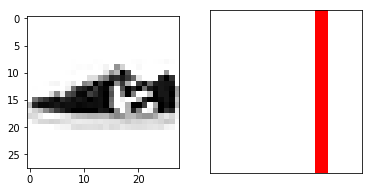

In [57]:
from matplotlib import pyplot as plt

def check(value,xx_test,real_y,predicted_y):
    if real_y[take] == np.argmax(predicted_y[value]):
        plt.imshow(xx_test[value],cmap=plt.cm.binary)
    else:
        print('Wrong prediction')

def plot_value_array(i, predictions_array):
  predictions_array = predictions_array[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')       

take = 700
yt = np.array(y_test)

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
check(take,X_test,yt,pre)

plt.subplot(1,2,2)
plot_value_array(take,pre)